# Umsetzung der ResNet Klassifizierer 

Import der verwendeten Module und Pakete. 

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *


# Laden der Daten
Die Vorbereiteten Daten für die ResNet Umsetzung laden.

In [3]:
path = Path('/content/gdrive/MyDrive/Seminar/fish_1')

In [4]:
# setzen der Transformationen 
batch_tfms = [*aug_transforms(size=224, min_scale=0.75, flip_vert=True, max_warp=0), 
              Normalize.from_stats(*imagenet_stats)]
bs=64

In [5]:
# DataLoaders mit Transformationen erstellen
fish = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460), 
    batch_tfms=batch_tfms)
dls = fish.dataloaders(path, bs=bs)

In [6]:
# Test des DataLoaders
# dls.show_batch(nrows=1,ncols=3)

In [7]:
# Test der Transformationen
# dls.show_batch(nrows=2, ncols=4, unique=true)

# Umsetzung mit ResNet34 

In [ ]:
learn34 = cnn_learner(dls, resnet34, metrics=error_rate)

In [10]:
learn34.summary()

stage-1

In [12]:
learn34.lr_find()

In [ ]:
# Anpassung mit der ausgewählten Anzahl an Epochen
learn34.fit_one_cycle(13, lr_max=2e-3)

In [ ]:
learn34.recorder.plot_loss()

In [56]:
# speichern
# learn34.save('stage-1_res34-13ep')

Path('models/stage-1_res32-12ep-7acc.pth')

stage-2

In [64]:
# laden
# learn34 = cnn_learner(dls, resnet34, metrics=error_rate)
# learn34.load('stage-1_res34-13ep')

In [ ]:
learn34.unfreeze()
learn34.lr_find()

In [ ]:
learn34.unfreeze()
learn34.fit_one_cycle(7, lr_max=slice(1e-5, 1.4e-4))

In [45]:
# speichern und exportieren des Learners nach stage-2
# learn34.save('stage-2_res34_7ep-047')
# learn34.export()

In [ ]:
learn34.recorder.plot_loss()

# Umsetzung mit ResNet101

In [ ]:
learn101 = cnn_learner(dls, resnet101, metrics=error_rate)

In [ ]:
learn101.summary()

stage-1

In [ ]:
learn101.lr_find()

In [83]:
learn101 = cnn_learner(dls, resnet101, metrics=error_rate)

In [ ]:
learn101.fit_one_cycle(10, lr_max=3e-4)

In [ ]:
# speichern stage-1
# learn101.save('stage-1_res101-10ep')

In [ ]:
# laden
# learn101 = cnn_learner(dls, resnet101, metrics=error_rate)
# learn101.load('stage-1_res101-10ep')

In [ ]:
learn101.recorder.plot_loss()

stage-2

In [ ]:
learn101.unfreeze()
learn101.lr_find()

In [ ]:
learn101.unfreeze()
learn101.fit_one_cycle(13, lr_max=slice(6e-6, 1e-4))

In [ ]:
learn101.recorder.plot_loss()

In [ ]:
# speichern und exportieren von stage-2
# learn101.save('stage-2_res101_13ep-0536acc_Final')
# learn101.export()

In [ ]:
# laden
# learn101.load('stage-2_res101_12ep')

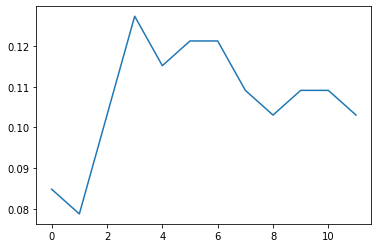

In [ ]:
# plotten der error_rate, falls gewünscht
# plt.plot(L(learn101.recorder.values).itemgot(2));

# Zusatz
In diesem Abschnitt sind einige Zusatzfunktionen zur Interpretation der Ergebnisse zu einfachen Umsetzung hinterlegt, identisch zu EfficientNet.

In [ ]:
# weitere Auswertungen falls gewünscht
# learn34 = ResNet34 Learner
# learn101 = ResNet101 Learner
interp = ClassificationInterpretation.from_learner(learn34)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
# fehlerhaft klassifizierte Bilder anzeigen
interp.plot_top_losses(5, nrows=5)

In [ ]:
# extrahieren der exogenen und endogenen Variablen
x,y = dls.one_batch()

In [ ]:
# auslesen der Klassenbezeichnung der endogenen Variablen
dls.vocab

In [ ]:
y

In [ ]:
# auslesener der Klassenwahrscheinlichkeiten des ersten Bildes
preds,_ = learn34.get_preds(dl=[(x,y)])
preds[0]

In [ ]:
# prüfe die Summe der Wahrscheinlichkeiten
len(preds[0]), preds[0].sum()